# Differential Phase Contrast

In [3]:
# Download the data for this notebook
import download
download.run()

current_folder = /home/edill/dev/python/scikit-beam-examples/demos/dpc
/home/edill/dev/python/scikit-beam-examples/demos/dpc/SOFC does not exist


### notebook requirements
- clint
- matplotlib
- scipy
- numpy

In [4]:
# install the dependencies for this notebooks
!conda install -c ericdill clint --yes
!conda install scipy numpy matplotlib --yes

Fetching package metadata: ..........
Solving package specifications: ............
# All requested packages already installed.
# packages in environment at /home/edill/mc/envs/beam35:
#
clint                     0.5.1                    py35_0    file:///home/edill/mc/conda-bld/linux-64/clint-0.5.1-py35_0.tar.bz2
Fetching package metadata: ........
Solving package specifications: ..............................
# All requested packages already installed.
# packages in environment at /home/edill/mc/envs/beam35:
#
matplotlib                1.5.1               np110py35_0  
numpy                     1.10.2                   py35_0  
scipy                     0.16.1              np110py35_0  


In [5]:
# all the imports
import os
import tempfile
from subprocess import call
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pims import ImageSequence
import zipfile
import time as ttime
from skbeam.core import dpc
%matplotlib notebook

dpc.logger.setLevel(dpc.logging.DEBUG)

In [6]:
# Set parameters
start_point = [1, 0]
first_image = 1
pixel_size = (55, 55)
focus_to_det = 1.46e6
scan_xstep = 0.1
scan_ystep = 0.1
scan_rows = 121
scan_cols = 121
energy = 19.5
roi = None
padding = 0
weighting = 1.
bad_pixels = None
solver = 'Nelder-Mead'
images = ImageSequence(os.path.join('SOFC', '*.tif'))
img_size = images[0].shape
ref_image = np.ones(img_size)
scale = True
negate = True

### Demo the incremental updates

<IPython.core.display.Javascript object>


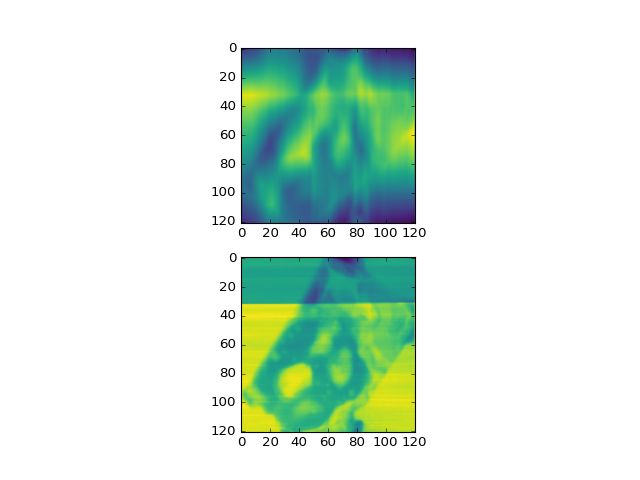

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

In [8]:
dpc_gen = dpc.lazy_dpc(ref_image, images, start_point, scan_rows, 
                       scan_cols, solver, roi, bad_pixels)

In [9]:
for idx, intermediate_state in enumerate(dpc_gen):
    if idx % 100 == 0:
        print('processing %s' % idx)
        phase, amplitude = dpc.reconstruct_phase_from_partial_info(
            intermediate_state, energy, scan_xstep, scan_ystep, pixel_size[0], 
            focus_to_det, negate, padding, weighting)
        ax1.imshow(phase, cmap='viridis')
        ax2.imshow(amplitude, cmap='viridis')
        fig.canvas.draw()
        ttime.sleep(0.01)
# provide a final update
ax1.imshow(phase, cmap='viridis')
ax2.imshow(amplitude, cmap='viridis')

processing 0
processing 100
processing 200
processing 300
processing 400
processing 500
processing 600
processing 700
processing 800
processing 900
processing 1000
processing 1100
processing 1200
processing 1300
processing 1400
processing 1500
processing 1600
processing 1700
processing 1800
processing 1900
processing 2000
processing 2100
processing 2200
processing 2300
processing 2400
processing 2500
processing 2600
processing 2700
processing 2800
processing 2900
processing 3000
processing 3100
processing 3200
processing 3300
processing 3400
processing 3500
processing 3600
processing 3700
processing 3800
processing 3900
processing 4000
processing 4100
processing 4200
processing 4300
processing 4400
processing 4500
processing 4600
processing 4700
processing 4800
processing 4900
processing 5000
processing 5100
processing 5200
processing 5300
processing 5400
processing 5500
processing 5600
processing 5700
processing 5800
processing 5900
processing 6000
processing 6100
processing 6200
proc

/home/edill/dev/python/scikit-beam/skbeam/core/dpc.py:275: RuntimeWarning: invalid value encountered in true_divide
  c = -1j * (kappax * tx * (1 - weighting) + kappay * ty * weighting) / div_v


### Demo the non-generator implementation. 
Note that this takes a long time to run! 

In [10]:
# Use skxray.dpc.dpc_runner
phase, amplitude = dpc.dpc_runner(
    ref_image, images, start_point, pixel_size, focus_to_det, scan_rows,
    scan_cols, scan_xstep, scan_ystep, energy, padding, weighting, solver,
    roi, bad_pixels, negate, scale)

/home/edill/dev/python/scikit-beam/skbeam/core/dpc.py:275: RuntimeWarning: invalid value encountered in true_divide
  c = -1j * (kappax * tx * (1 - weighting) + kappay * ty * weighting) / div_v


<IPython.core.display.Javascript object>


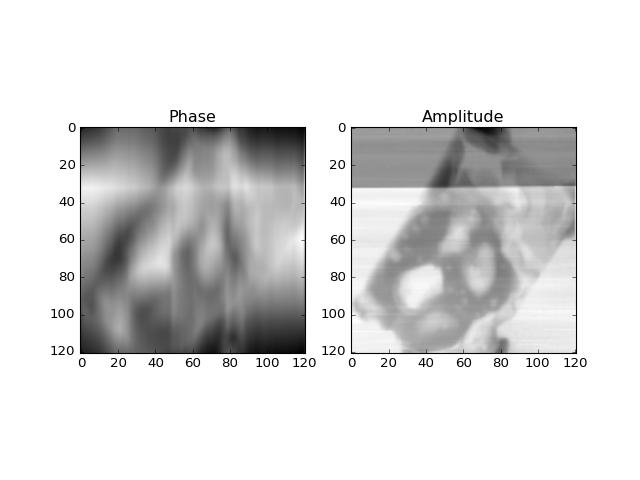

In [11]:
# display results
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(phase, cmap='gray')
ax[1].imshow(amplitude, cmap='gray')
ax[0].set_title('Phase')
ax[1].set_title('Amplitude')

In [12]:
import skbeam


In [13]:
skbeam.__version__

'0.0.6+6.gbb38d11.dirty'